<a href="https://colab.research.google.com/github/ayush2444/LetsGrowMore-Internship-/blob/main/Iris_Flower_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Let's Grow More Data Science Virtual Internship Program July 2023

###BY: Ayush shrivastava

###BEGINNER LEVEL TASK

###TASK 1: Iris Flowers Classification ML Project

####This particular ML project is usually referred to as the “Hello World” of Machine Learning. The iris flowers dataset contains numeric attributes, and it is perfect for beginners to learn about supervised ML algorithms, mainly how to load and handle data. Also, since this is a small dataset, it can easily fit in memory without requiring special transformations or scaling capabilities.

In [ ]:
# Import Libraries
# For data visualisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Machine learning model selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay

# For feature engineering and selection
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score    #to measure model performance
from sklearn.preprocessing import LabelEncoder

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                          names = ['sepal_length_in_cm','sepal_width_in_cm','petal_length_in_cm',
                                   'petal_width_in_cm','categories_of_flower'] )

In [ ]:
df.head()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,categories_of_flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   sepal_length_in_cm    150 non-null    float64
 1   sepal_width_in_cm     150 non-null    float64
 2   petal_length_in_cm    150 non-null    float64
 3   petal_width_in_cm     150 non-null    float64
 4   categories_of_flower  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
df.describe()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.dtypes

sepal_length_in_cm      float64
sepal_width_in_cm       float64
petal_length_in_cm      float64
petal_width_in_cm       float64
categories_of_flower     object
dtype: object

In [ ]:
df.columns

Index(['sepal_length_in_cm', 'sepal_width_in_cm', 'petal_length_in_cm',
       'petal_width_in_cm', 'categories_of_flower'],
      dtype='object')

In [ ]:
dir(df)

['T',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdivmod__',
 '__reduce__',
 '__reduce_ex_

###checking Null Values

In [ ]:
df.isnull().sum()

sepal_length_in_cm      0
sepal_width_in_cm       0
petal_length_in_cm      0
petal_width_in_cm       0
categories_of_flower    0
dtype: int64

###Checking duplicate data

In [ ]:
df.duplicated().sum()

3

In [ ]:
flower_data = df.drop_duplicates()
flower_data.duplicated().sum()

0

#Exploratory Data Analysis

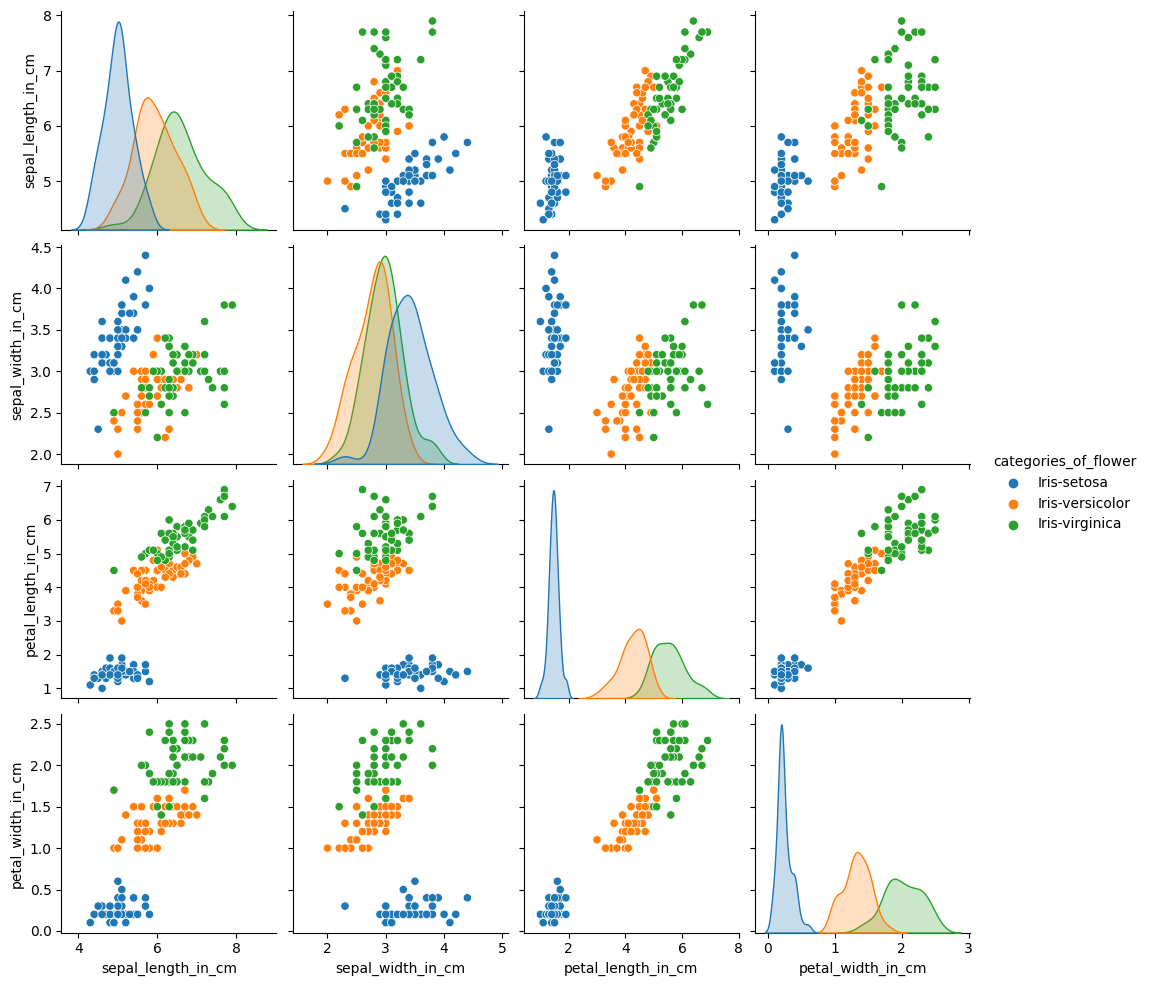

In [ ]:
# Pairwise scatter plot to visualize relationships between variables
sns.pairplot(df, hue = "categories_of_flower")
plt.show()

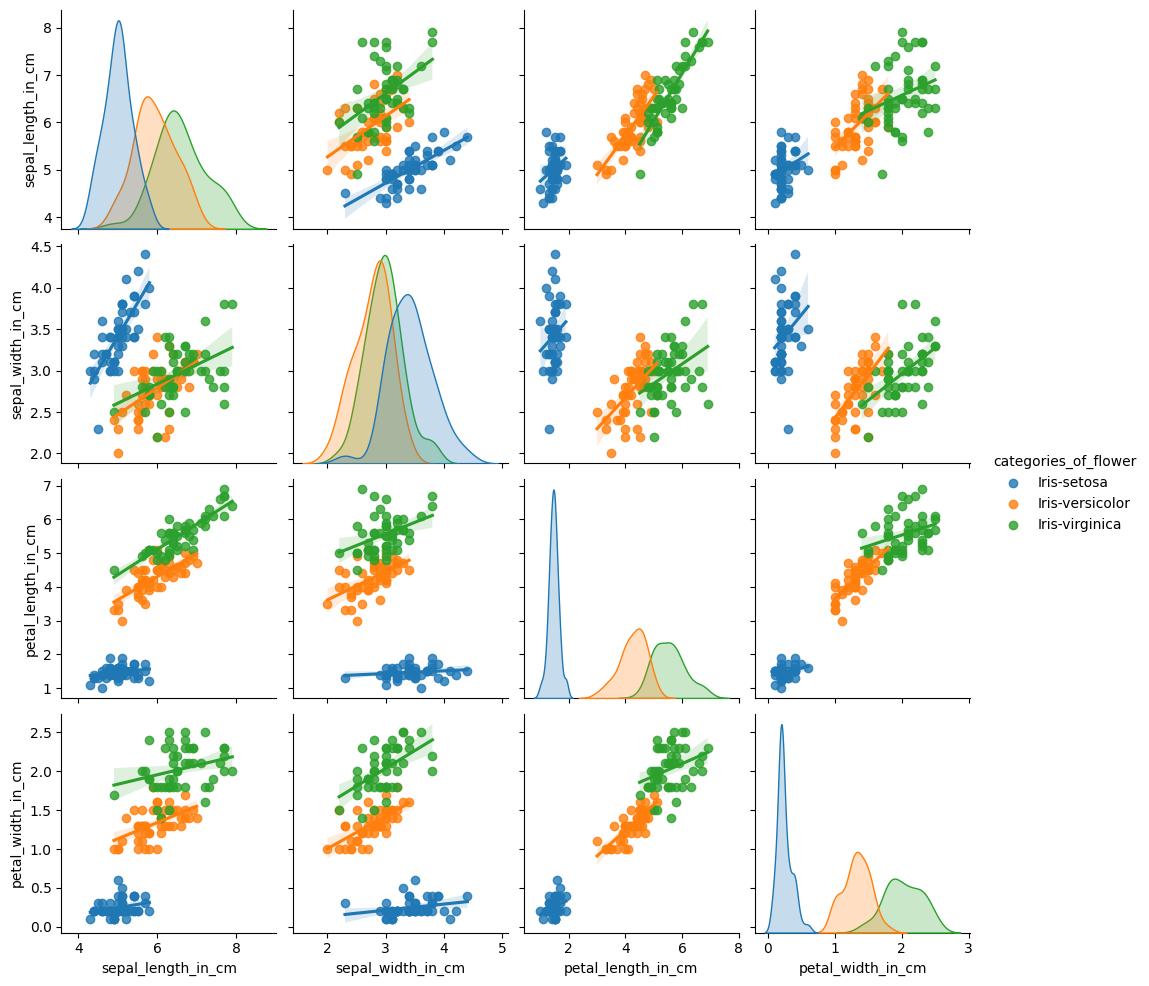

In [ ]:
sns.pairplot(df, hue = "categories_of_flower" , kind ='reg')

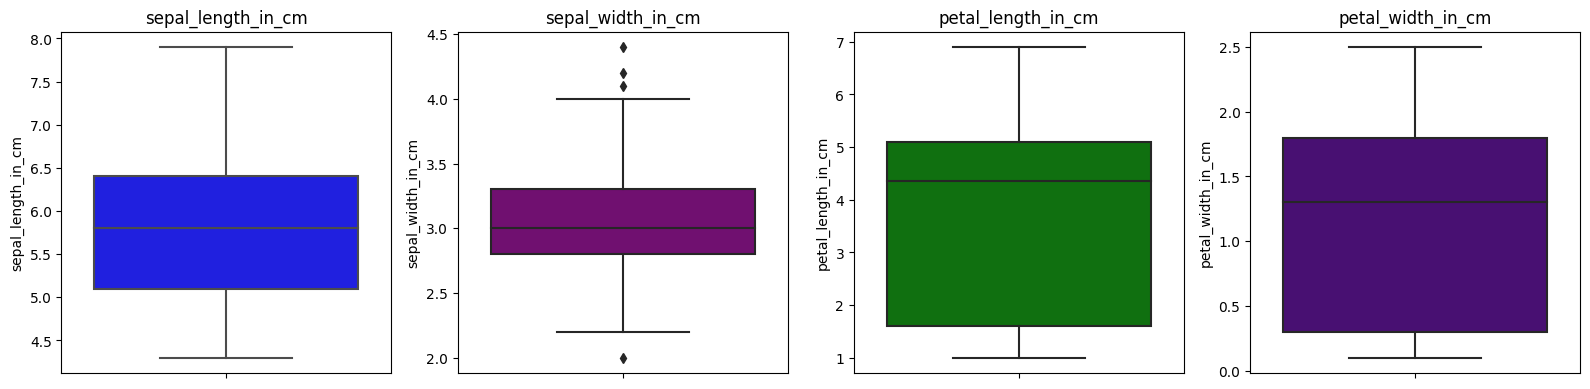

In [ ]:
plt.figure(figsize=(16, 4))

variables = ['sepal_length_in_cm', 'sepal_width_in_cm', 'petal_length_in_cm', 'petal_width_in_cm']
colors = ['blue', 'purple', 'green', 'indigo']

for i, variable in enumerate(variables):
    plt.subplot(1, 4, i+1)
    sns.boxplot(data=df, y=variable, color=colors[i])
    plt.title(variable)

plt.tight_layout()
plt.show()


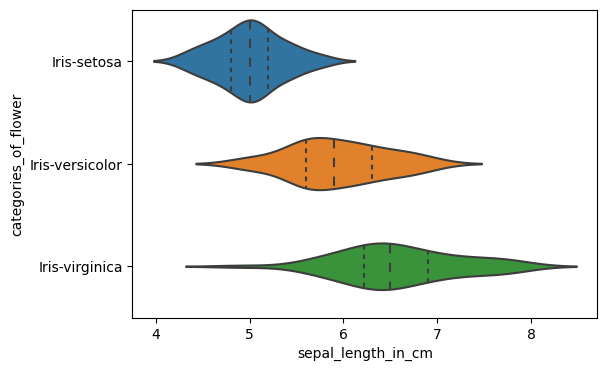

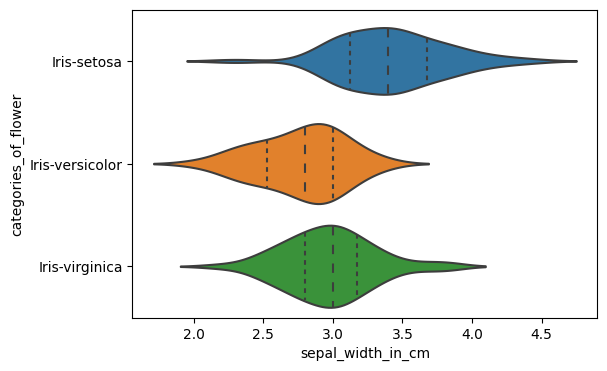

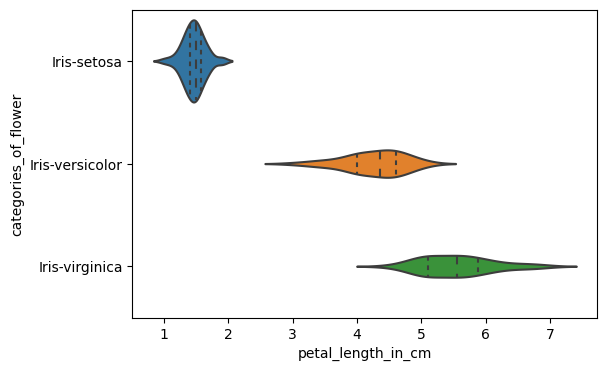

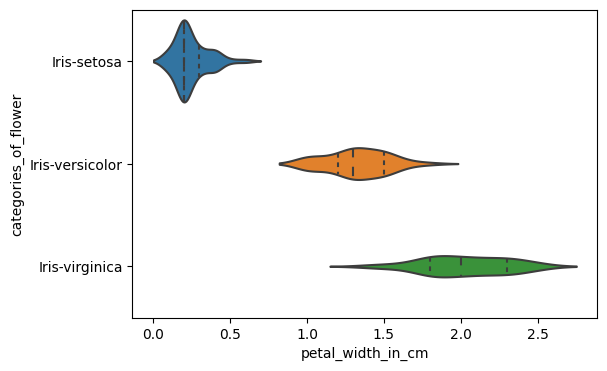

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

variables = ['sepal_length_in_cm', 'sepal_width_in_cm', 'petal_length_in_cm', 'petal_width_in_cm']

for variable in variables:
    plt.figure(figsize=(6, 4))
    sns.violinplot(y='categories_of_flower', x=variable, data=df, inner='quartile')
    plt.show()


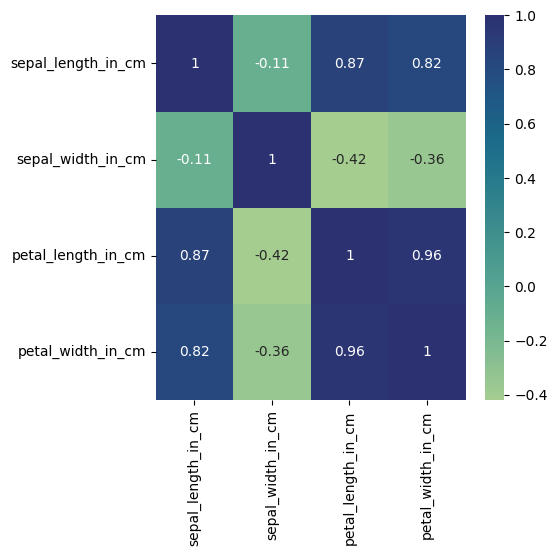

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True,cmap='crest')
plt.show()

###Outlier detection

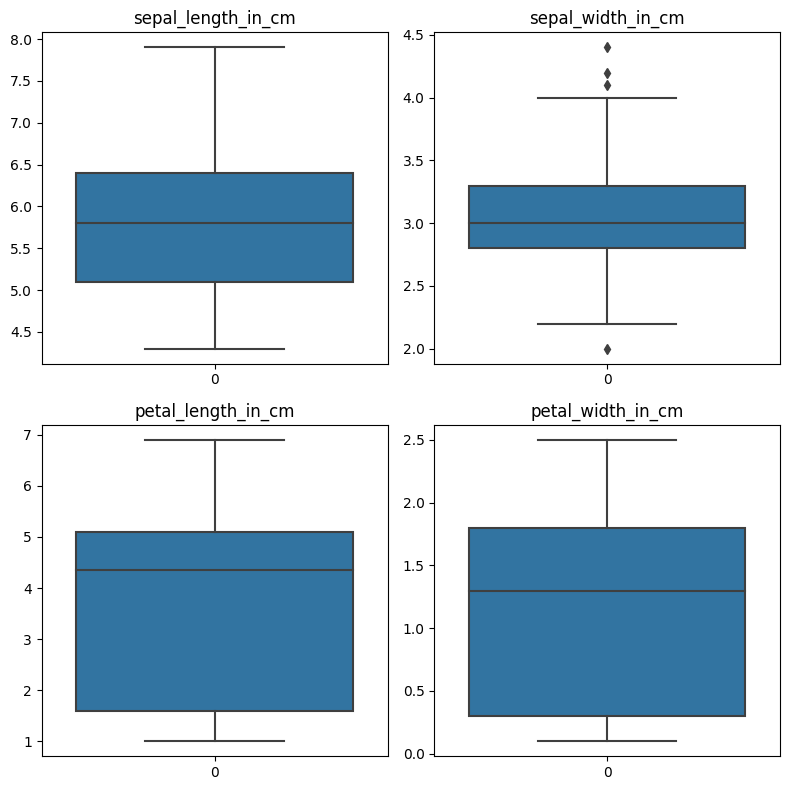

In [ ]:
# Handling Outliers & Outlier treatments
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8,8))
for i, ax in zip(df, axes.flatten()):
    sns.boxplot(df[i], ax=ax)
    ax.set_title(i)
plt.tight_layout()

In [ ]:
##using IQR to define the code for outlier detection and percentage.

Q1 = df['sepal_width_in_cm'].quantile(0.25)
Q3 = df['sepal_width_in_cm'].quantile(0.75)
IQR = Q3 - Q1

print("Quartile 1:", Q1)
print("Quartile 3:", Q3)
print("Interquartile Range:", IQR)

upper = Q3 + 1.5 * IQR
lower = Q1 - 1.5 * IQR

print("Upper Bound:", upper)
print("Lower Bound:", lower)

outliers_upper = df[df['sepal_width_in_cm'] > upper]
outliers_lower = df[df['sepal_width_in_cm'] < lower]

print("Number of Outliers (Upper):", outliers_upper.shape[0])
print("Number of Outliers (Lower):", outliers_lower.shape[0])



Quartile 1: 2.8
Quartile 3: 3.3
Interquartile Range: 0.5
Upper Bound: 4.05
Lower Bound: 2.05
Number of Outliers (Upper): 3
Number of Outliers (Lower): 1


In [ ]:
print("Before Removing Outliers : ", df.shape)
data = df.drop(index= outliers_upper.shape[0])
data = df.drop(index= outliers_lower.shape[0])

Before Removing Outliers :  (150, 5)


In [ ]:
print("Before Removing Outliers:", df.shape)

data = df[(df['sepal_width_in_cm'] >= lower) & (df['sepal_width_in_cm'] <= upper)]

print("After Removing Outliers:", data.shape)


Before Removing Outliers: (150, 5)
After Removing Outliers: (146, 5)


sepal_length_in_cm       Axes(0.125,0.53;0.352273x0.35)
sepal_width_in_cm     Axes(0.547727,0.53;0.352273x0.35)
petal_length_in_cm       Axes(0.125,0.11;0.352273x0.35)
petal_width_in_cm     Axes(0.547727,0.11;0.352273x0.35)
dtype: object

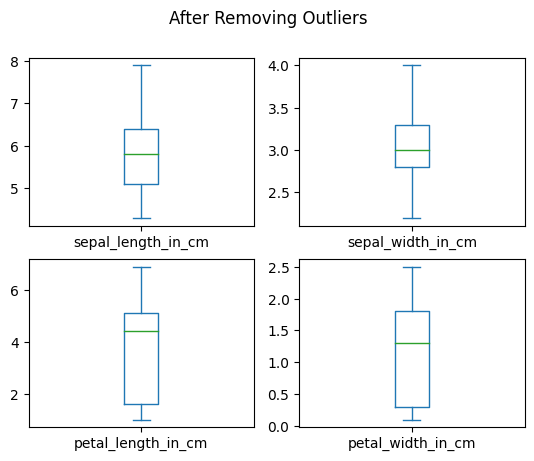

In [ ]:
data.plot(kind = 'box',subplots = True, layout = (2,2), title = 'After Removing Outliers')

In [ ]:
df.head()

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,categories_of_flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


##Label Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()

In [ ]:
df['categories_of_flower'] = label_encode.fit_transform = (df['categories_of_flower'])
df.head(10)

,sepal_length_in_cm,sepal_width_in_cm,petal_length_in_cm,petal_width_in_cm,categories_of_flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


## TrainTest Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.drop(columns=['categories_of_flower'])
Y = df['categories_of_flower']
x_train , x_test , y_train , y_test = train_test_split(x , Y , test_size = 0.3,  random_state=0)

##Logistic Regression

In [ ]:
logistic= LogisticRegression()
logistic.fit(x_train , y_train)

LogisticRegression()

In [ ]:
accuracy = logistic.score(x_test,y_test)*100
print("accuracy : ",accuracy)

accuracy :  97.77777777777777


In [ ]:
y_pred = logistic.predict(x_test)
score=accuracy_score(y_test,y_pred)

In [ ]:
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred, labels=classes)
    fig, ax = plt.subplots()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)
    plt.title('Confusion Matrix')
    plt.show()

def report(model, x_test, y_test):
    preds = model.predict(x_test)
    print(classification_report(y_test, preds))
    classes = np.unique(y_test)
    plot_confusion_matrix(y_test, preds, classes)


Logistic Regression
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



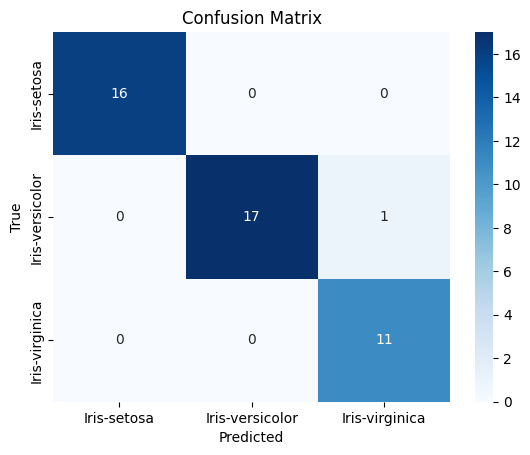

Accuracy: 97.78%


In [ ]:
print('Logistic Regression')
report(logistic, x_test, y_test)
print(f'Accuracy: {round(score*100,2)}%')

##DecisionTree


In [ ]:
DT_classifier = DecisionTreeClassifier()
decision_tree  = DT_classifier.fit(x_train ,y_train)

In [ ]:
y_pred = decision_tree.predict(x_test)
score=accuracy_score(y_test,y_pred)

decision Tree Classifier
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



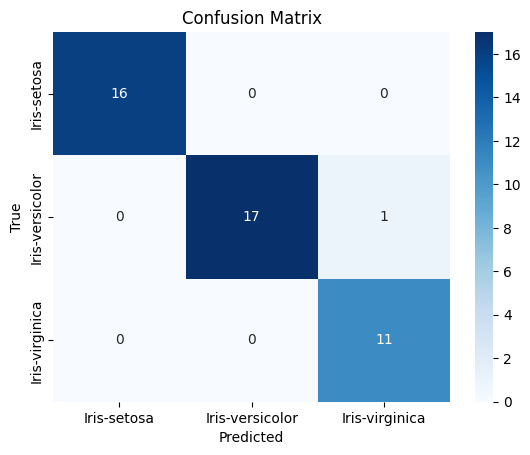

Accuracy: 97.78%


In [ ]:
print('decision Tree Classifier')
report(decision_tree, x_test, y_test)
print(f'Accuracy: {round(score*100,2)}%')

##Support Vector Classifier

In [ ]:
Svc = SVC()
Support_vector = Svc.fit(x_train , y_train)

In [ ]:
y_pred = Support_vector.predict(x_test)

SVM Classifier
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



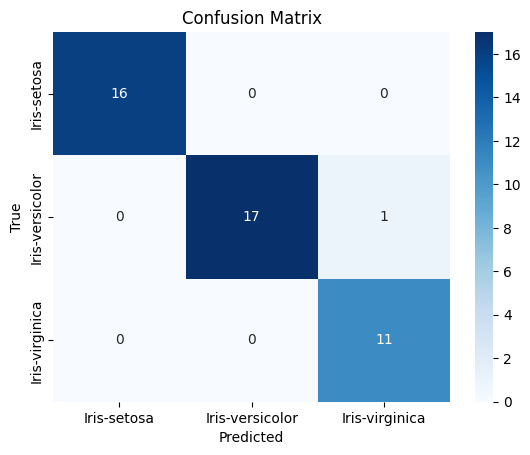

Accuracy: 97.78%


In [ ]:
print('SVM Classifier')
report(Support_vector, x_test, y_test)
print(f'Accuracy: {round(score*100,2)}%')

##K-Nearest Neighbors

In [ ]:
K_classifier = KNeighborsClassifier()
K_nearst = K_classifier.fit(x_train,y_train)

In [ ]:
y_pred = K_nearst.predict(x_test)
score=accuracy_score(y_test,y_pred)

K - Nearest Neighbours [ KNN]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        16
Iris-versicolor       1.00      0.94      0.97        18
 Iris-virginica       0.92      1.00      0.96        11

       accuracy                           0.98        45
      macro avg       0.97      0.98      0.98        45
   weighted avg       0.98      0.98      0.98        45



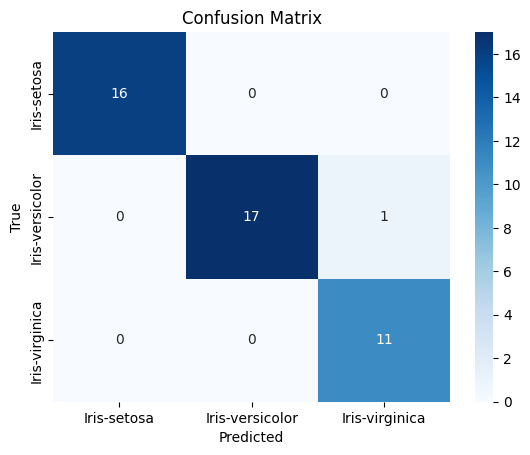

Accuracy: 97.78%


In [ ]:
print('K - Nearest Neighbours [ KNN]')
report(K_nearst, x_test,y_test)
print(f'Accuracy: {round(score*100,2)}%')

In [ ]:
models = ["Logistic_regression","decision Tree" , 'SVM' , 'KNN']
Accuracy = [97.77,  97.78 , 97.78, 97.78,]

# Create dataframe from the lists
Data_frame = {'Models': models, 'Accuracy': Accuracy}
get_metrics = pd.DataFrame(Data_frame)

# Printing dataframe
get_metrics




,Models,Accuracy
0,Logistic_regression,97.77
1,decision Tree,97.78
2,SVM,97.78
3,KNN,97.78
